In [5]:
import os
print(os.listdir())


['.git', 'BMW _sales.csv', 'BMW_analysis4.ipynb', 'README.md']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("BMW_sales.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
49995,False
49996,False
49997,False
49998,False


In [8]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
display(correlation_matrix)

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
Year,1.000000,-0.001944,0.008741,0.003547,0.001671
Engine_Size_L,-0.001944,1.000000,-0.004906,0.000146,-0.003942
Mileage_KM,0.008741,-0.004906,1.000000,-0.004238,0.001434
Price_USD,0.003547,0.000146,-0.004238,1.000000,0.000080
Sales_Volume,0.001671,-0.003942,0.001434,0.000080,1.000000


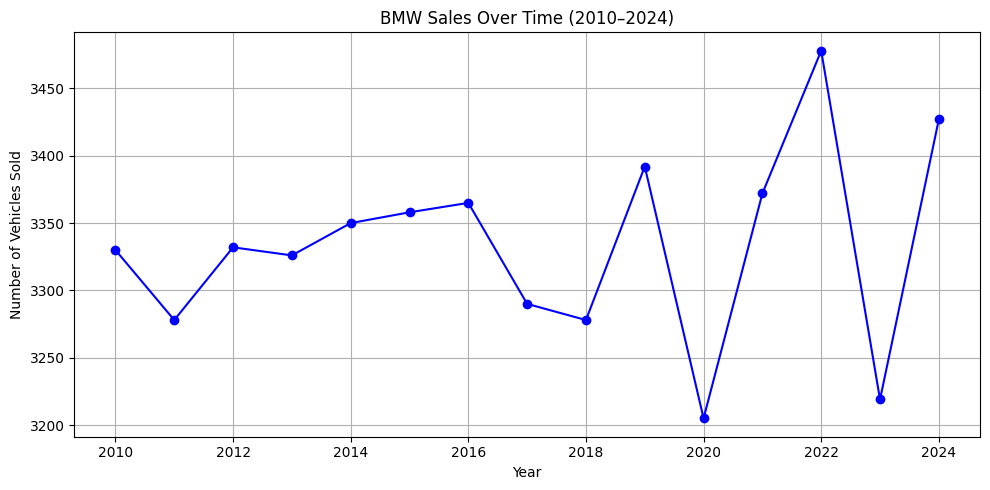

In [5]:
import os
import pandas as pd

# Derive a unified 'year' column from either 'sale_date' or existing 'Year' column
if 'sale_date' in df.columns:
    df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
    df['year'] = df['sale_date'].dt.year
elif 'Year' in df.columns:
    # Ensure numeric year
    df['year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
else:
    raise KeyError("No 'sale_date' or 'Year' column found in dataframe")

# Group by year and count sales
yearly_sales = df.groupby('year').size().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='blue')
plt.title('BMW Sales Over Time (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.tight_layout()

# Ensure output directory exists and save the figure BEFORE showing it
os.makedirs('visualizations', exist_ok=True)
plt.savefig('visualizations/bmw_sales_over_time.png', dpi=300, bbox_inches='tight')

# Show and close
plt.show()
plt.close()

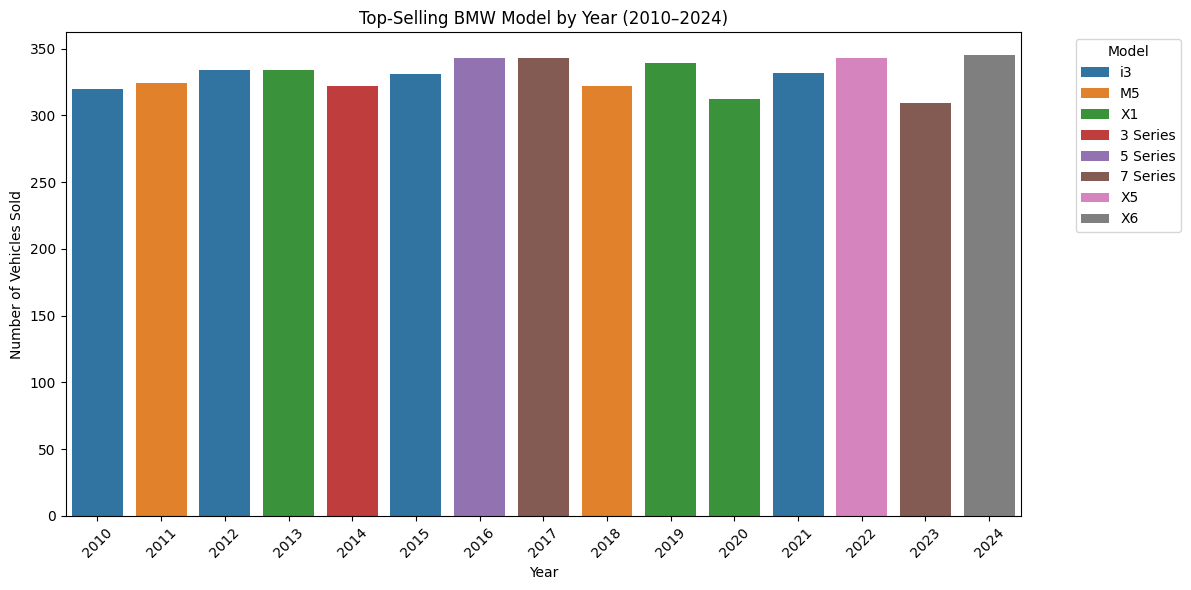

In [25]:
# Group by year and model, count sales
grouped = df.groupby(['Year', 'Model']).size().reset_index(name='sales')

# Get the top model per year
top_models_per_year = grouped.loc[grouped.groupby('Year')['sales'].idxmax()]

# Sort by year
top_models_per_year = top_models_per_year.sort_values('Year')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_models_per_year,
    x='Year', y='sales', hue='Model', dodge=False,
    palette='tab10'
)
plt.title('Top-Selling BMW Model by Year (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







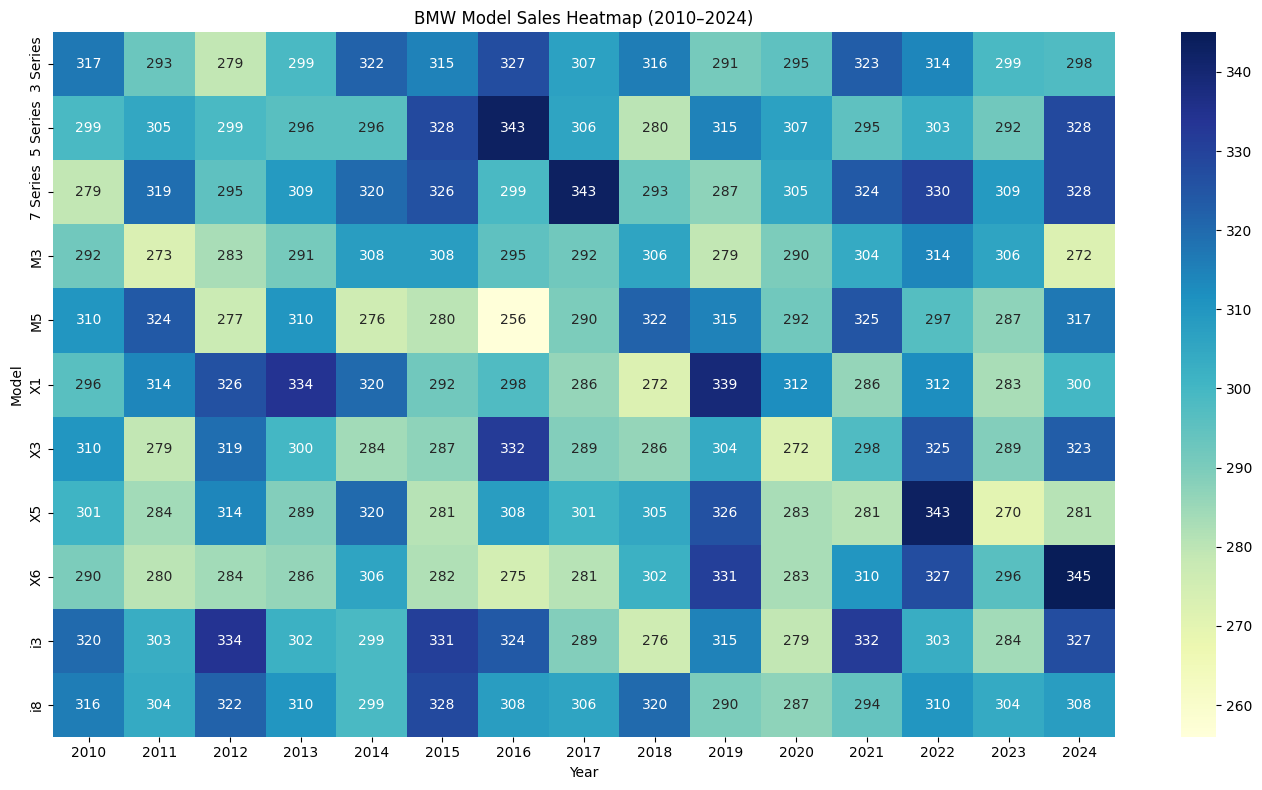

In [7]:
import seaborn as sns

# Ensure a unified 'year' column exists (derived from 'sale_date' or 'Year')
if 'sale_date' in df.columns:
    df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
    df['year'] = df['sale_date'].dt.year
elif 'Year' in df.columns:
    df['year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
else:
    raise KeyError("No 'sale_date' or 'Year' column found in dataframe")

# Build a pivot: rows=year, cols=Model -> counts; fill missing with 0
sales_by_model = df.groupby(['year', 'Model']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(sales_by_model.T, cmap="YlGnBu", annot=True, fmt='g')
plt.title('BMW Model Sales Heatmap (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Model')
plt.tight_layout()
# Ensure output directory exists and save the figure BEFORE showing it
os.makedirs('visualizations', exist_ok=True)
plt.savefig('visualizations/bmw_model_sales_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [31]:
# Filter for electric and hybrid cars
electric_hybrid_sales = df[df['Fuel_Type'].isin(['Electric', 'Hybrid'])]

# Group by fuel type and sum sales volume
sales_comparison = electric_hybrid_sales.groupby('Fuel_Type')['Sales_Volume'].sum().reset_index()

# Display the comparison
display(sales_comparison)

,Fuel_Type,Sales_Volume
0,Electric,63157665
1,Hybrid,64532097


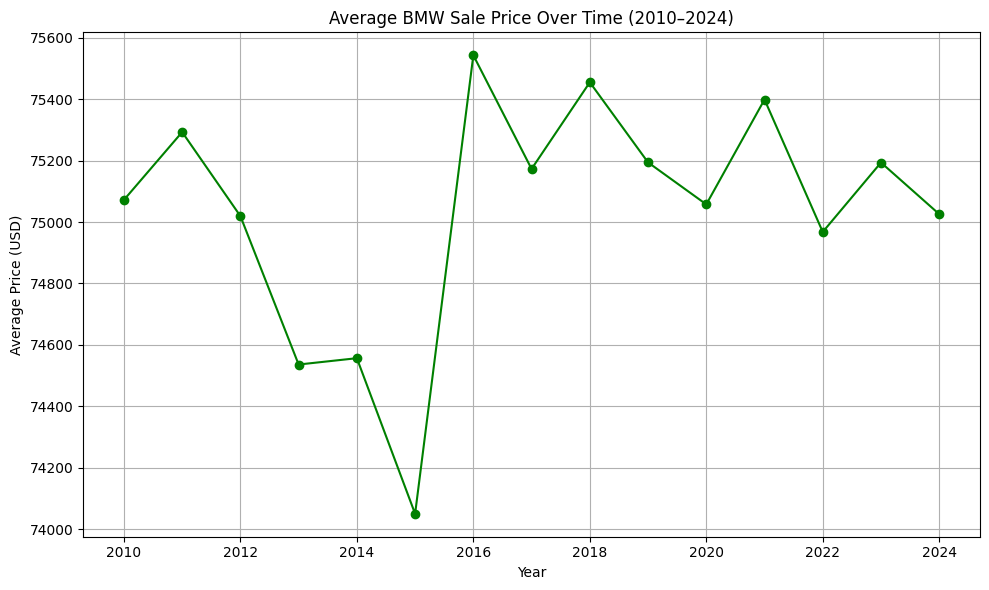

In [46]:
# Group by year and calculate average price
average_price_by_year = df.groupby('Year')['Price_USD'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year['Year'], average_price_by_year['Price_USD'], marker='o', color='green')
plt.title('Average BMW Sale Price Over Time (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

,Region,Model,sales
1,Africa,5 Series,789
16,Asia,X1,816
32,Europe,i8,823
35,Middle East,7 Series,810
46,North America,7 Series,791
65,South America,i8,796


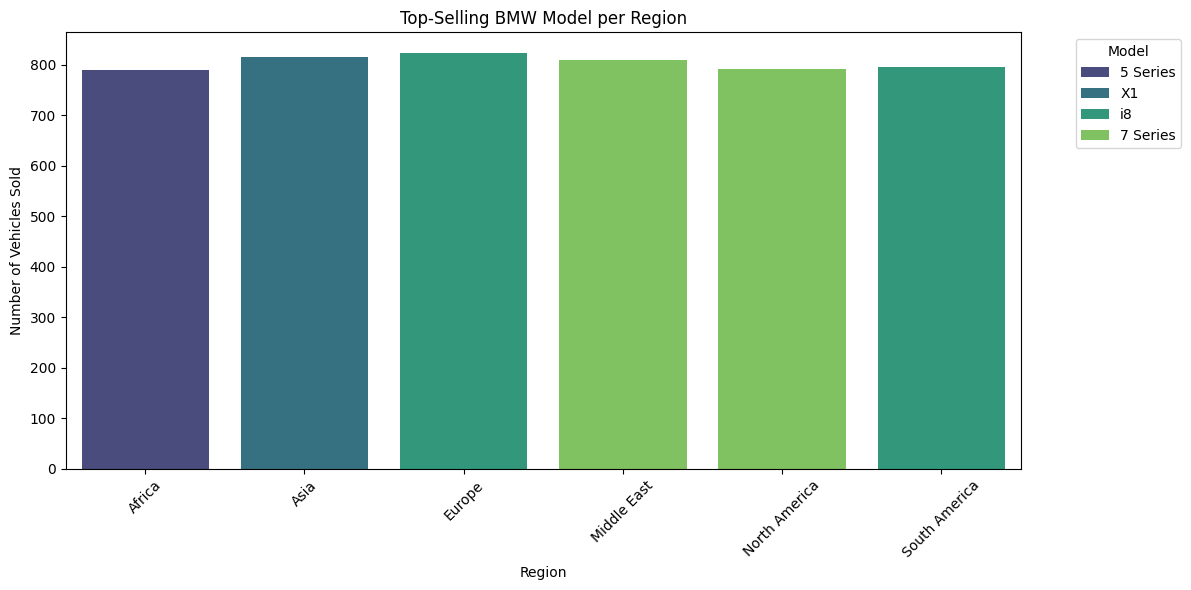

In [50]:
# Group by region and model, count sales
sales_by_region_model = df.groupby(['Region', 'Model']).size().reset_index(name='sales')

# Get the top-selling model per region
top_selling_models_per_region = sales_by_region_model.loc[sales_by_region_model.groupby('Region')['sales'].idxmax()]

# Display the top-selling models per region
display(top_selling_models_per_region)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_selling_models_per_region, x='Region', y='sales', hue='Model', palette='viridis', dodge=False)
plt.title('Top-Selling BMW Model per Region')
plt.xlabel('Region')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
average_sales_by_region = df.groupby('Region')['Sales_Volume'].mean().reset_index()
display(average_sales_by_region)

,Region,Sales_Volume
0,Africa,5036.380952
1,Asia,5083.306955
2,Europe,5106.208063
3,Middle East,5055.131972
4,North America,5087.298020
5,South America,5035.973579


In [51]:
# Group by year and fuel_type, count cars
fuel_type_adoption = df.groupby(['Year', 'Fuel_Type']).size().unstack(fill_value=0)

# Display the results
display(fuel_type_adoption)

Fuel_Type,Diesel,Electric,Hybrid,Petrol
Year,,,,
2010,829,837,826,838
2011,791,841,837,809
2012,791,825,880,836
2013,815,821,843,847
2014,867,810,868,805
2015,803,826,869,860
2016,842,849,814,860
2017,801,822,822,845
2018,801,859,803,815
